# Praktikum Pembelajaran Mesin 1
- Bagas Sambega Rosyada (13522071)
- Raden Francisco Trianto B.(13522091)


## Import Libraries

In [ ]:
from IPython.display import Markdown, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import f1_score, log_loss, accuracy_score, f1_score, log_loss

# Function to display markdown
def print_markdown(md_text: str) -> None:
    display(Markdown(md_text))

## Import Dataset

In [ ]:
df_train: pd.DataFrame = pd.read_csv('https://drive.google.com/uc?id=1OoefWhr9a4cin7sRLjGdETkDcCTB9PAi')
df_test: pd.DataFrame = pd.read_csv('https://drive.google.com/uc?id=1wcXvKcDzNXOkY7XWCki8t7Aq3NiJ40ni')
temp_test = df_test.copy()

df_train.head()
print(df_test.head())

       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  467287    Male           No   28       Yes  Entertainment              NaN   
1  466142  Female          Yes   29       Yes  Entertainment              0.0   
2  465257    Male           No   20       NaN     Healthcare              4.0   
3  464043    Male          Yes   51       Yes  Entertainment              1.0   
4  459055  Female           No   19        No  Entertainment              1.0   

  Spending_Score  Family_Size  Var_1  
0            Low          3.0  Cat_4  
1        Average          2.0  Cat_6  
2            Low          5.0  Cat_2  
3        Average          4.0  Cat_6  
4            Low          5.0  Cat_6  


# 1. Exploratory Data Analysis

### 1) Data Size

In [ ]:
print(f"Number of instances: {df_train.shape[0]} | Number of features: {df_train.shape[1] - 2}") # -2 for id and target
print(f"Number of target class: 1")

Number of instances: 5647 | Number of features: 9
Number of target class: 1


### 2) Features and Target


In [ ]:
### Drop id from dataset
if 'ID' in df_train.columns:
  df_train = df_train.drop(columns=['ID'])

target_col: list[str] = ["Segmentation"]
categorical_features: list[str] = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1"]
numerical_features: list[str] = [col for col in df_train.columns if col not in categorical_features and col not in target_col and col != 'id']

df_categorical: pd.DataFrame = df_train[categorical_features]
df_numeric: pd.DataFrame = df_train[numerical_features]

print("Target Collumn:", target_col)
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Target Collumn: ['Segmentation']
Categorical Features: ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
Numerical Features: ['Age', 'Work_Experience', 'Family_Size']


### 3) Data Types

In [ ]:
print(df_train.dtypes.to_string())

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object


### 4) Missing Value

In [ ]:
missing_counts = df_train.isnull().sum()
total_rows = len(df_train)

# Calculate the percentage of missing data for each column
missing_percentage = (missing_counts / total_rows) * 100

missing_data_summary = pd.DataFrame({'Missing Values': missing_counts, 'Percentage': missing_percentage})

missing_data_summary = missing_data_summary.sort_values(by='Percentage', ascending=False)

print(missing_data_summary)


                 Missing Values  Percentage
Work_Experience             562    9.952187
Family_Size                 224    3.966708
Ever_Married                 84    1.487515
Profession                   79    1.398973
Var_1                        53    0.938551
Graduated                    40    0.708341
Gender                        0    0.000000
Age                           0    0.000000
Spending_Score                0    0.000000
Segmentation                  0    0.000000


### 5) Unique Values for Categorical

In [ ]:
for col in categorical_features:
    print(f"Column {col}: {df_train[col].dropna().nunique()}")

Column Gender: 2
Column Ever_Married: 2
Column Graduated: 2
Column Profession: 9
Column Spending_Score: 3
Column Var_1: 7


### 6) Value Distribution

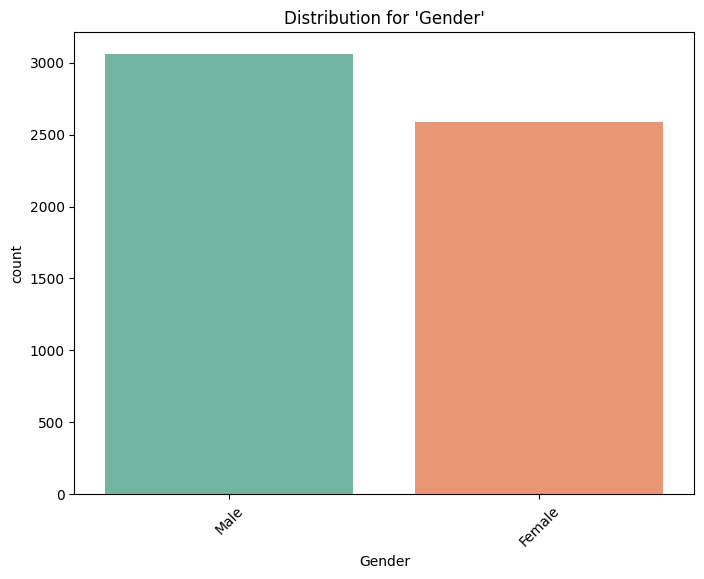

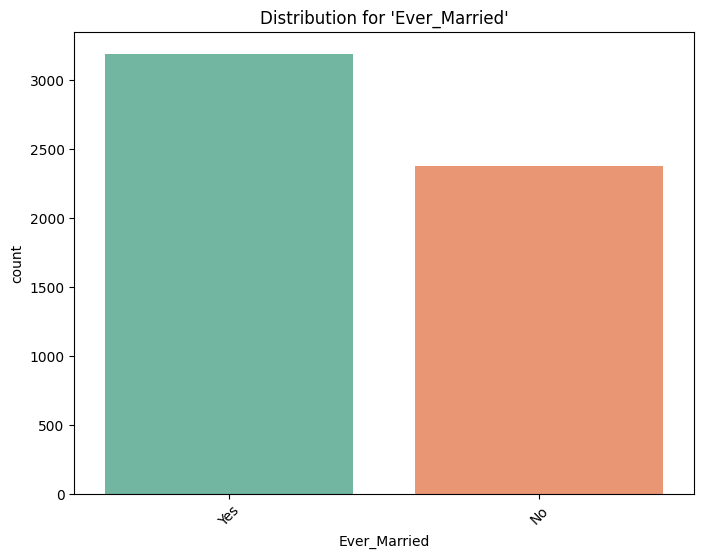

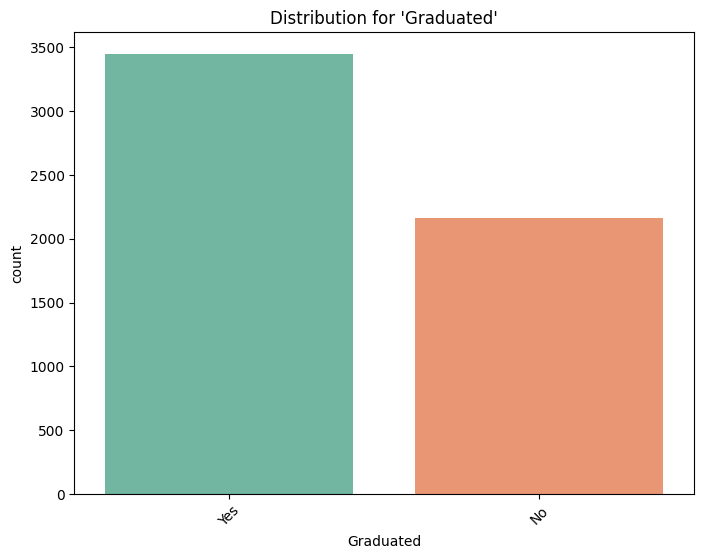

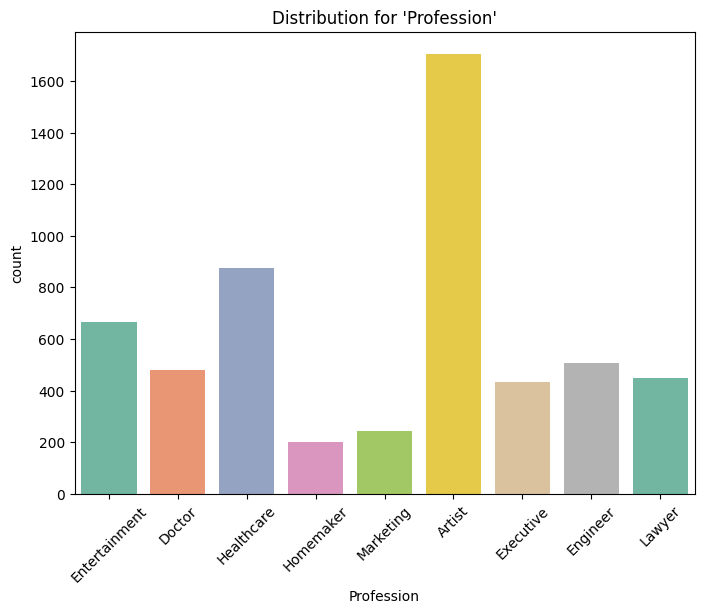

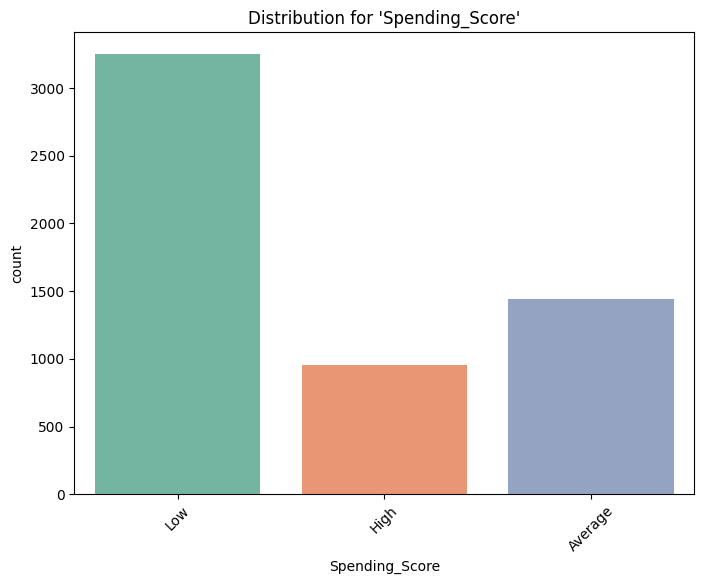

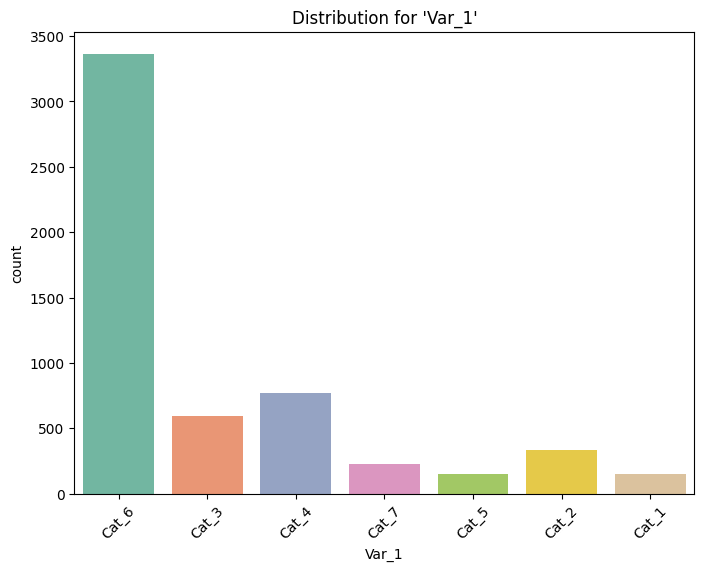

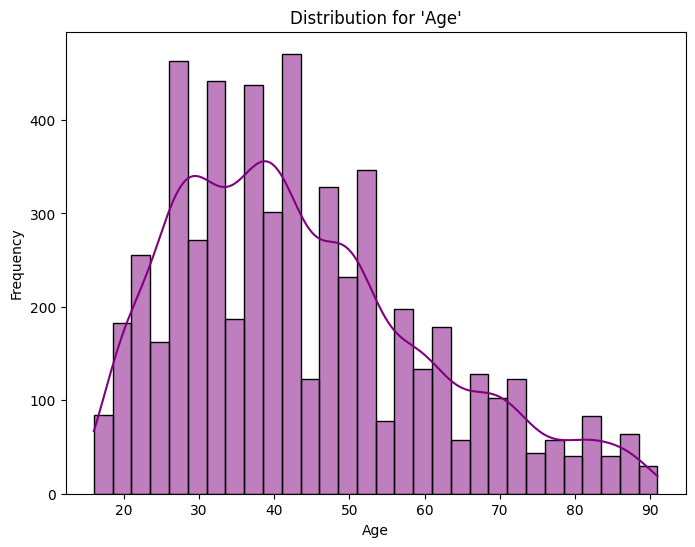

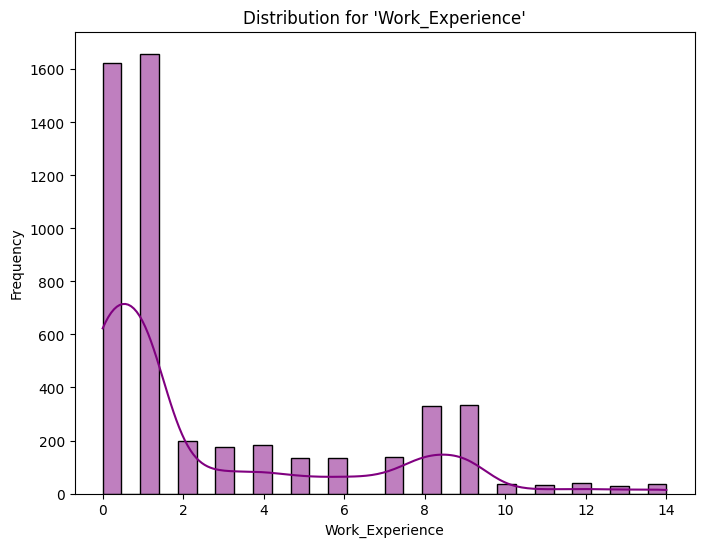

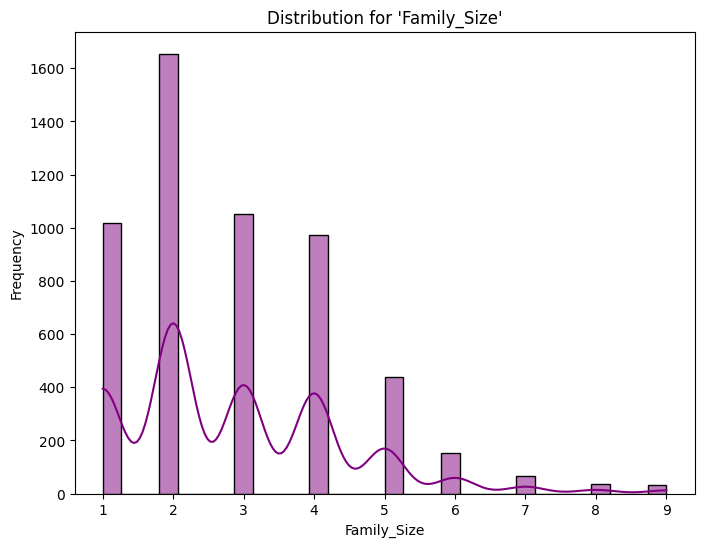

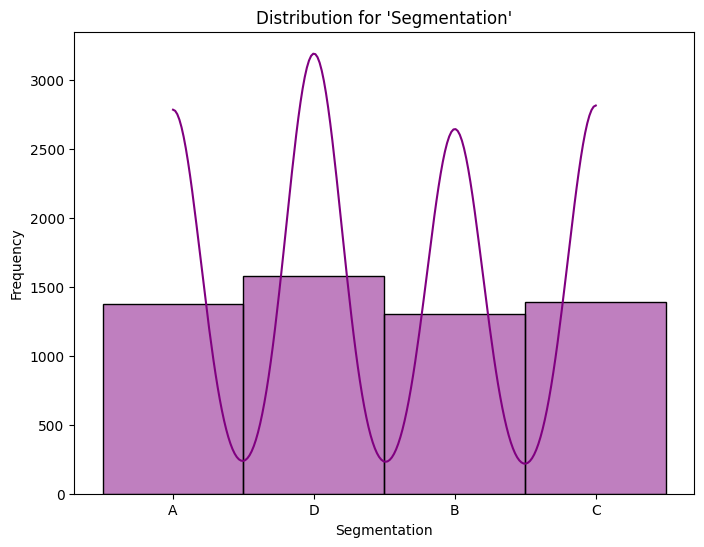

In [ ]:
# Categorical column distribution plot
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df_train[col].dropna(), palette='Set2', hue=df_train[col], legend=False)
    plt.title(f"Distribution for '{col}'")
    plt.xticks(rotation=45)
    plt.show()

# Numerical column distribution plot (using histograms)
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_train[col].dropna(), kde=True, bins=30, color='purple')
    plt.title(f"Distribution for '{col}'")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Target column distribution plot (using histograms)
for col in target_col:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_train[col].dropna(), kde=True, bins=30, color='purple')
    plt.title(f"Distribution for '{col}'")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### 7) Outliers

In [ ]:
# Outlier detection for numerical features (IQR method)
for col in numerical_features:
    print(f"\nOutliers detection for '{col}':")

    # Calculate Q1, Q3, and IQR
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying outliers
    outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    outlier_percentage = (outlier_count / total_rows) * 100

    print(f"Number of outliers: {outlier_count} | Percentage of outliers: {outlier_percentage:.2f}%")


Outliers detection for 'Age':
Number of outliers: 50 | Percentage of outliers: 0.89%

Outliers detection for 'Work_Experience':
Number of outliers: 139 | Percentage of outliers: 2.46%

Outliers detection for 'Family_Size':
Number of outliers: 67 | Percentage of outliers: 1.19%


### 8) Mean, Median, Average, Min, Max for Numerical Features

In [ ]:
df_train[numerical_features].describe()

,Age,Work_Experience,Family_Size
count,5647.000000,5085.000000,5423.000000
mean,43.663538,2.654277,2.861147
std,16.779417,3.429239,1.536501
min,16.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,91.000000,14.000000,9.000000


### 9) Correlations between Features

Correlation between features only for non-categorical columns


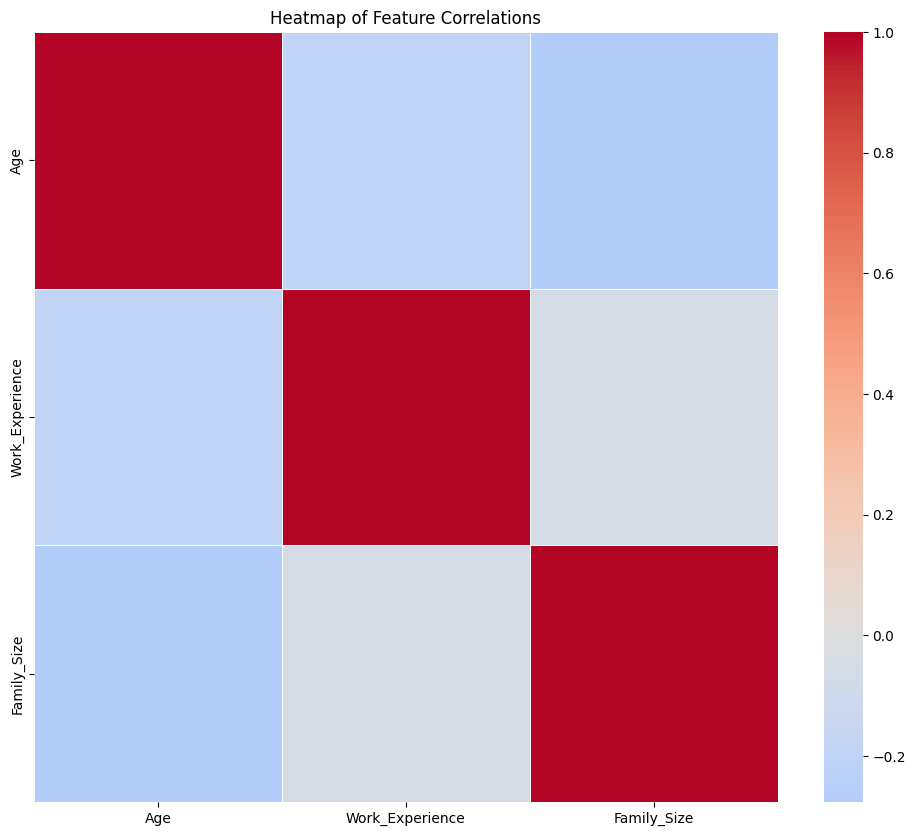

                      Age  Work_Experience  Family_Size
Age              1.000000        -0.196954    -0.276277
Work_Experience -0.196954         1.000000    -0.061036
Family_Size     -0.276277        -0.061036     1.000000


In [ ]:
print("Correlation between features only for non-categorical columns")
correlation = df_numeric.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation, annot=False, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")

plt.title("Heatmap of Feature Correlations")
plt.show()

print(correlation)

#### Visualization of Correlation between Categorical Features and Non-Categorical Features

##### Correlation between Gender and non-categorical columns

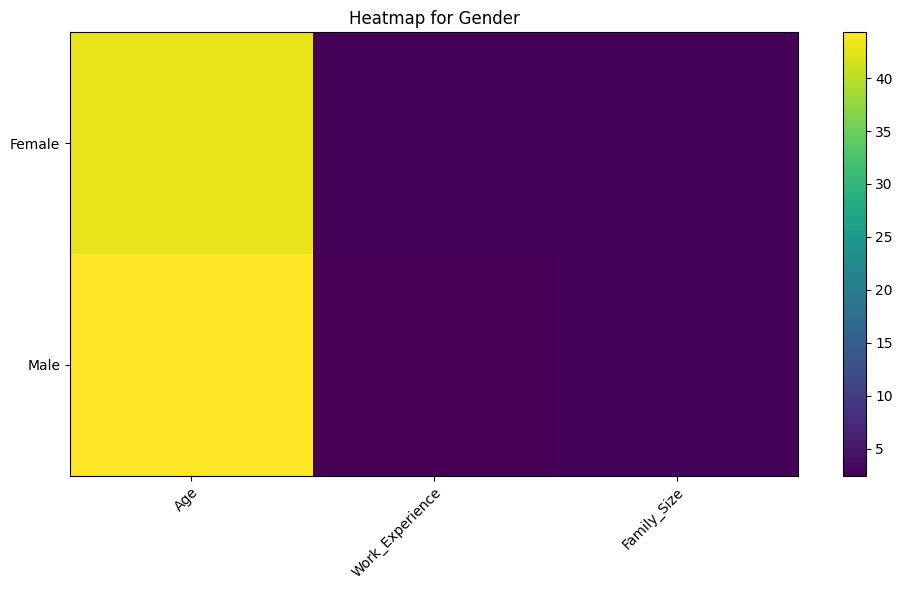

##### Correlation between Ever_Married and non-categorical columns

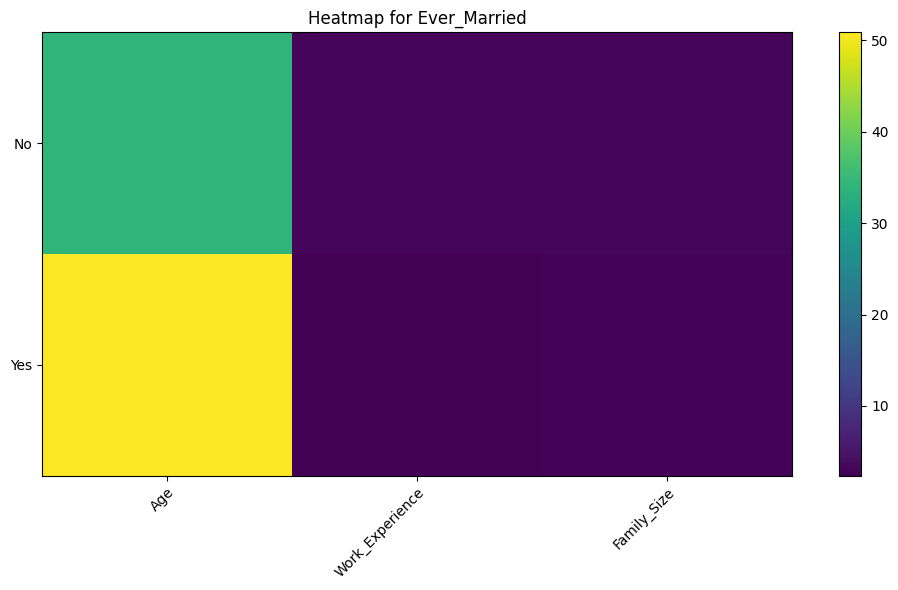

##### Correlation between Graduated and non-categorical columns

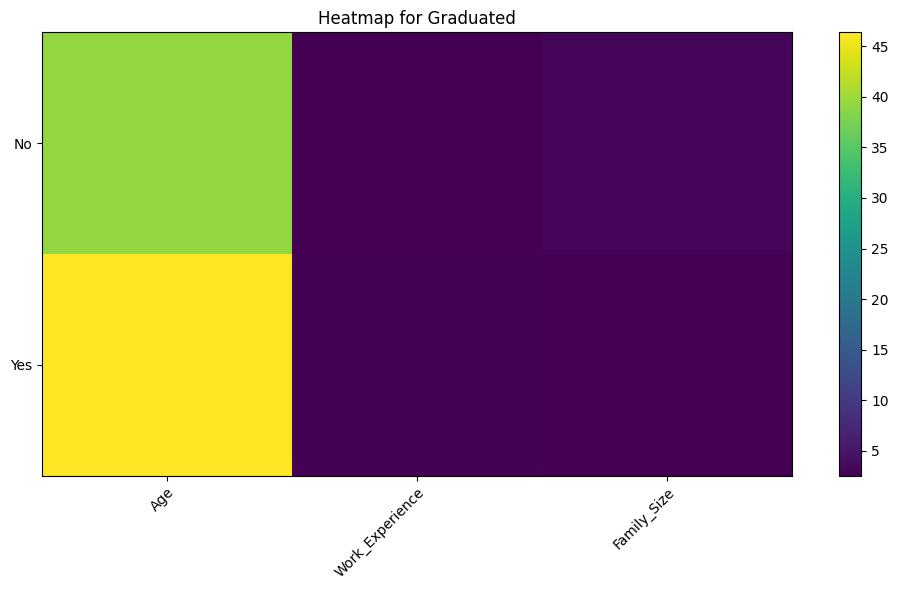

##### Correlation between Profession and non-categorical columns

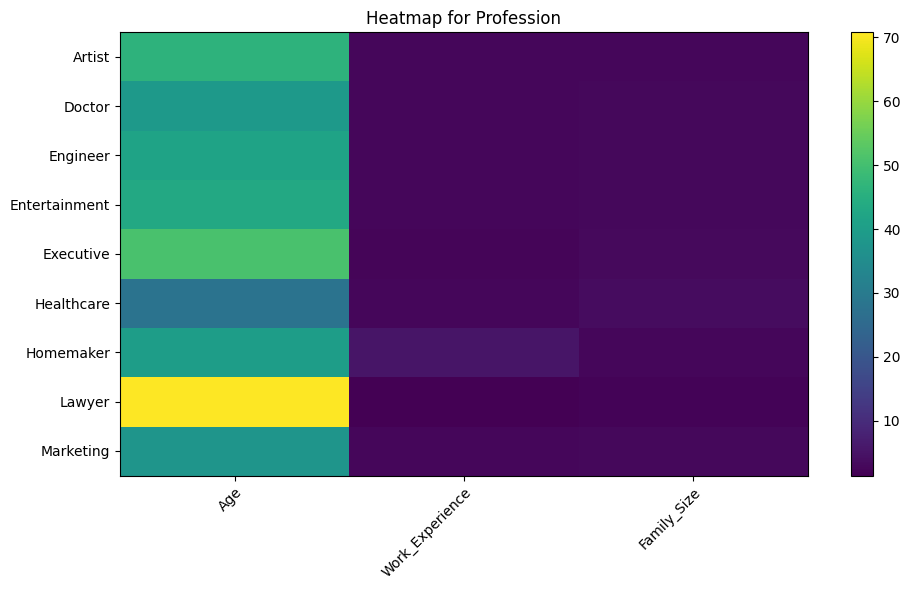

##### Correlation between Spending_Score and non-categorical columns

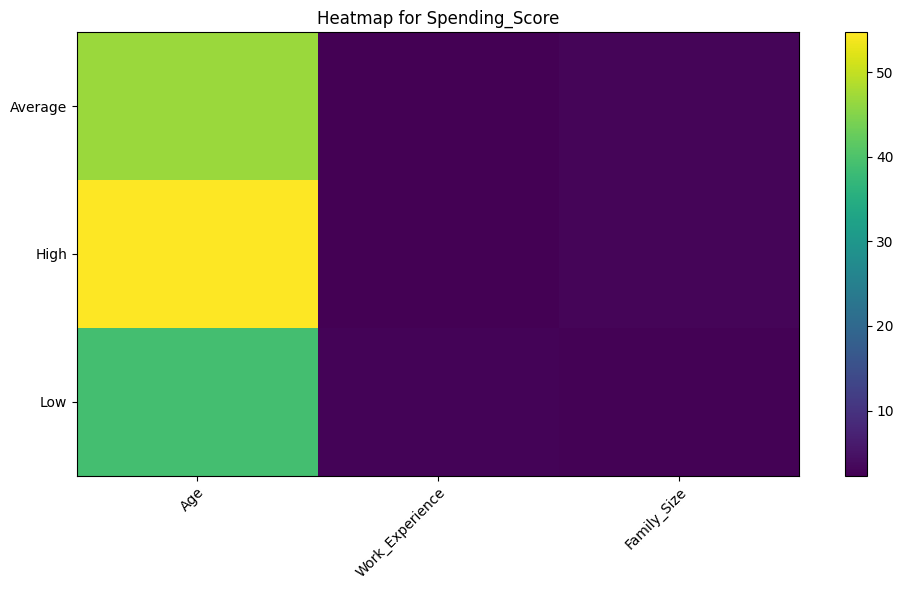

##### Correlation between Var_1 and non-categorical columns

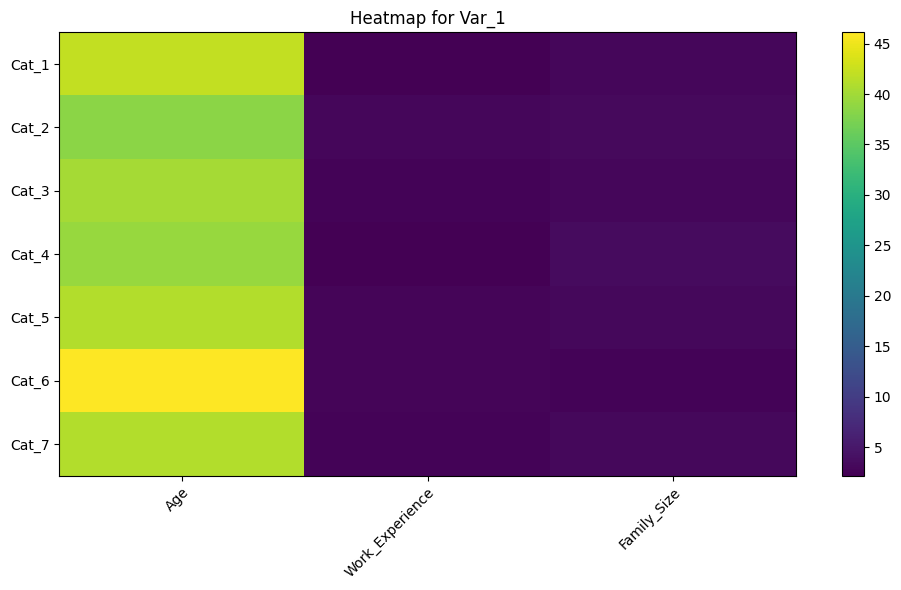

In [ ]:
print_markdown("#### Visualization of Correlation between Categorical Features and Non-Categorical Features")

for cat_col in categorical_features:
    print_markdown(f"##### Correlation between {cat_col} and non-categorical columns")
    pivot_table = df_train.groupby(cat_col)[numerical_features].mean()

    fig, ax = plt.subplots(figsize=(10, 6))
    im = ax.imshow(pivot_table, aspect="auto", cmap="viridis")

    ax.set_xticks(np.arange(len(numerical_features)), labels=numerical_features)
    ax.set_yticks(np.arange(len(pivot_table.index)), labels=pivot_table.index)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    for i in range(len(pivot_table.index)):
        for j in range(len(numerical_features)):
            text = ax.text(j, i, "", ha="center", va="center", color="w")

    ax.set_title(f"Heatmap for {cat_col}")
    fig.tight_layout()
    plt.colorbar(im)
    plt.show()



#### Visualization of Correlation between Non-Categorical Features and Target Variable

##### Correlation between Segmentation column and non-categorical columns

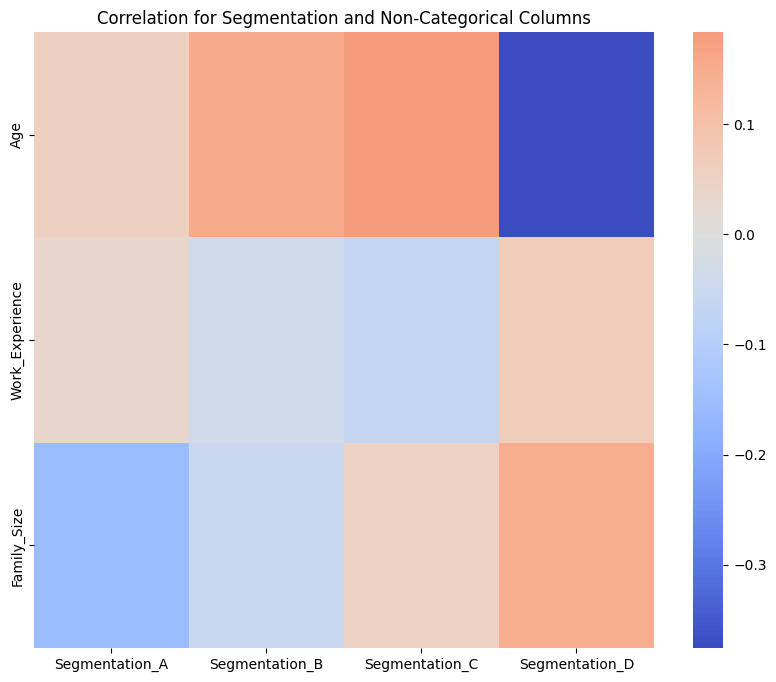

In [ ]:
print_markdown("#### Visualization of Correlation between Non-Categorical Features and Target Variable")
for target in target_col:
    print_markdown(f"##### Correlation between {target} column and non-categorical columns")
    df_encoded = pd.get_dummies(df_train[target], prefix=target)

    df_combined = pd.concat([df_train[numerical_features], df_encoded], axis=1)
    correlation_matrix = df_combined.corr()
    correlations = correlation_matrix.loc[numerical_features, df_encoded.columns]
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=False, cmap="coolwarm", center=0)
    plt.title(f"Correlation for {target} and Non-Categorical Columns")
    plt.show()

## 10) Analisis Tambahan EDA

1. Bagaimana distribusi kelas target 'Segmentation'? Apakah dataset seimbang?

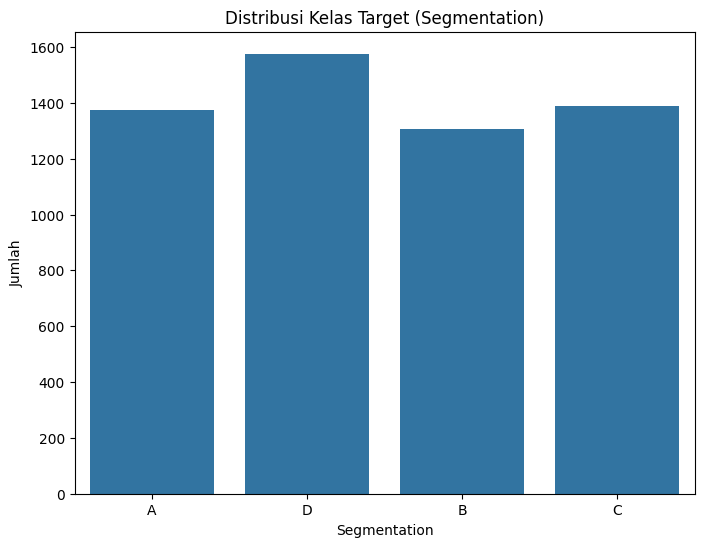

Berdasarkan gambar di atas, distribusi kelas target cukup seimbang, dengan frekuensi kelas D tertinggi. Distribusi target kelas dapar dilihat melalui tabel berikut

,count
Segmentation,
D,1576
C,1390
A,1375
B,1306


In [ ]:
print_markdown("1. Bagaimana distribusi kelas target 'Segmentation'? Apakah dataset seimbang?")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Segmentation', data=df_train, legend=False)
plt.title('Distribusi Kelas Target (Segmentation)')
plt.xlabel('Segmentation')
plt.ylabel('Jumlah')
plt.show()

print_markdown("Berdasarkan gambar di atas, distribusi kelas target cukup seimbang, dengan frekuensi kelas D tertinggi. Distribusi target kelas dapar dilihat melalui tabel berikut")

df_train['Segmentation'].value_counts()

2. Apa segmen pembeli terbanyak untuk produk A jika dilihat dari segi usia?

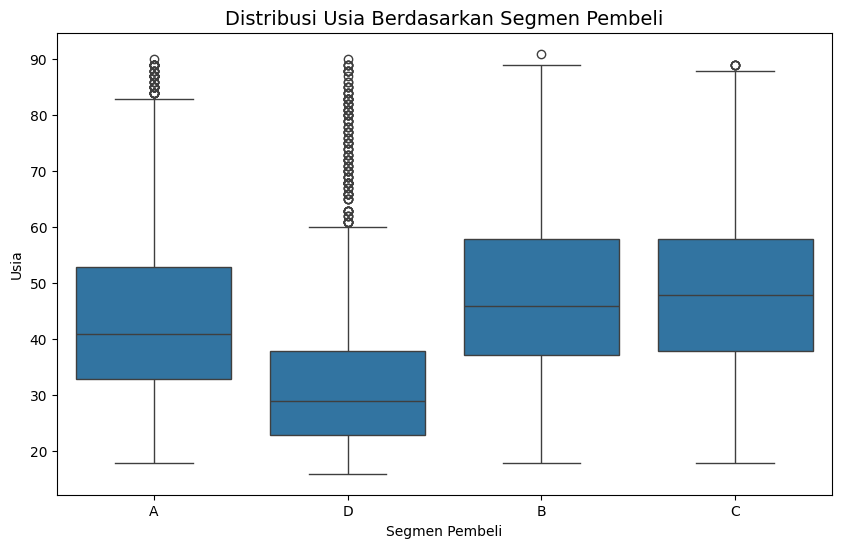

Berdasarkan boxplot di atas, kebanyakan pembeli produk A berkisar usia 33 sampai 53 tahun, sementara produk D jauh lebih variatif di usia  tua namun tetap banyak dibeli oleh pembeli dengan usia di bawah 40 tahun. Produk B dan C banyak dibeli oleh pembeli berusia 40 hingga 60 tahun-an

In [ ]:
print_markdown("2. Apa segmen pembeli terbanyak untuk produk A jika dilihat dari segi usia?")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 6))
sns.boxplot(x="Segmentation", y="Age", data=df_train, legend=False)
plt.title("Distribusi Usia Berdasarkan Segmen Pembeli", fontsize=14)
plt.xlabel("Segmen Pembeli")
plt.ylabel("Usia")
plt.show()

print_markdown("Berdasarkan boxplot di atas, kebanyakan pembeli produk A berkisar usia 33 sampai 53 tahun, sementara produk D jauh lebih variatif di usia \
 tua namun tetap banyak dibeli oleh pembeli dengan usia di bawah 40 tahun. Produk B dan C banyak dibeli oleh pembeli berusia 40 hingga 60 tahun-an")

Apakah ada hubungan antara setiap variabel numerik di dataset?

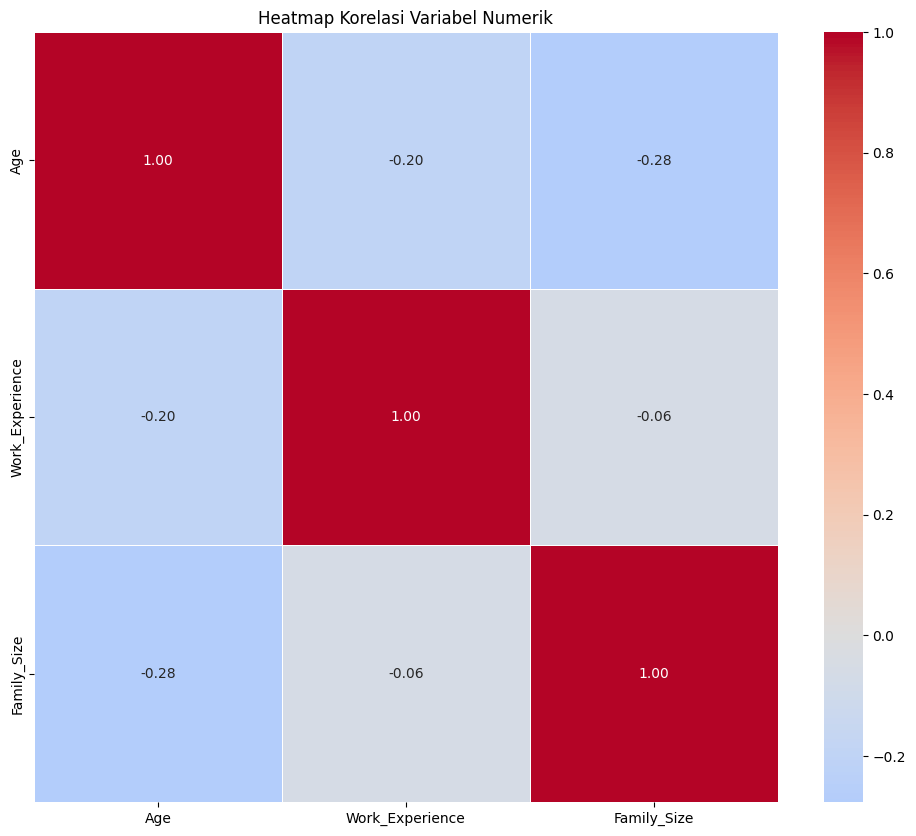

Hubungan antara data numerik kebanyakan bersifat negatif atau berbanding terbalik, misalnya semakin tinggi usianya, maka banyak anggota keluarganya semakin dikit. Hal ini menunjukkan korelasi berbanding terbalik

In [ ]:
print_markdown("Apakah ada hubungan antara setiap variabel numerik di dataset?")

import numpy as np

numerical_features = df_train.select_dtypes(include=np.number).columns.tolist()

correlation_matrix = df_train[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

print_markdown("Hubungan antara data numerik kebanyakan bersifat negatif atau berbanding terbalik, misalnya semakin tinggi usianya, maka banyak anggota \
keluarganya semakin dikit. Hal ini menunjukkan korelasi berbanding terbalik")

# 2. Data Cleaning and Preprocessing

### A. Data Cleaning

In [ ]:
shape_before_cleaning = df_train.shape

#### 1) Handling Missing Data

In [ ]:
def handle_missing_data(df, numerical_features, categorical_features) -> pd.DataFrame:
    num_imputer = SimpleImputer(strategy='mean')
    df[numerical_features] = num_imputer.fit_transform(df[numerical_features])

    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

    return df

missing_before = df_train.isnull().sum()
df_train = handle_missing_data(df_train, numerical_features, categorical_features)
missing_after = df_train.isnull().sum()
missing_summary = pd.DataFrame({
    'Before Imputation': missing_before,
    'After Imputation': missing_after
})

print("#### Missing Data Before and After Imputation:")
print(missing_summary)

#### Missing Data Before and After Imputation:
                 Before Imputation  After Imputation
Gender                           0                 0
Ever_Married                    84                 0
Age                              0                 0
Graduated                       40                 0
Profession                      79                 0
Work_Experience                562                 0
Spending_Score                   0                 0
Family_Size                    224                 0
Var_1                           53                 0
Segmentation                     0                 0


#### 2) Handling outlier

In [ ]:
def handle_outliers_and_rare_categories(df, numerical_features, categorical_features, z_threshold=3, rare_threshold=0.0001) -> pd.DataFrame:
    # Handle outliers using Z-Score
    rows_before_zscore = df.shape[0]

    z_scores = np.abs(zscore(df[numerical_features]))
    outlier_mask = (z_scores > z_threshold).any(axis=1)

    df = df[~outlier_mask]
    rows_after_zscore = df.shape[0]
    rows_removed_zscore = rows_before_zscore - rows_after_zscore

    print(f"Data removed by Z-Score: {rows_removed_zscore} rows")
    print(f"Total Data after Z-Score filtering: {df.shape[0]} rows")

    # Handle rare categories in categorical features
    rows_before_rare = df.shape[0]

    for col in categorical_features:
        category_counts = df[col].value_counts()
        threshold = rare_threshold * len(df)
        rare_categories = category_counts[category_counts < threshold].index

        df = df[~df[col].isin(rare_categories)]

    rows_after_rare = df.shape[0]
    rows_removed_rare = rows_before_rare - rows_after_rare

    print(f"Data removed by rare categories: {rows_removed_rare} rows")
    print(f"Total Data after Removing Rare Categories: {df.shape[0]} rows")

    return df

df_train = handle_outliers_and_rare_categories(df_train, numerical_features, categorical_features)

Data removed by Z-Score: 133 rows
Total Data after Z-Score filtering: 5514 rows
Data removed by rare categories: 0 rows
Total Data after Removing Rare Categories: 5514 rows


#### 3) Remove Duplicate

In [ ]:
def handle_duplicates(df) -> pd.DataFrame:
    # Count the number of duplicates before removal
    num_duplicates_before = df.duplicated().sum()
    print_markdown("Before duplicates removal")
    print(f"Number of duplicate rows: {num_duplicates_before}")
    print(f"Percent of duplicate rows: {num_duplicates_before / len(df) * 100:.2f}%")

    # Remove duplicate rows
    df.drop_duplicates(inplace=True)

    # Count the number of duplicates after removal
    num_duplicates_after = df.duplicated().sum()
    print_markdown("After duplicates removal")
    print(f"Number of duplicate rows: {num_duplicates_after}")

    return df

df_train = handle_duplicates(df_train)

Before duplicates removal

Number of duplicate rows: 121
Percent of duplicate rows: 2.19%


After duplicates removal

Number of duplicate rows: 0


#### 4) Feature Engineering

##### Remove Low Variance Features

In [ ]:
def remove_low_variance_features(df, numerical_features, threshold=0.01) -> tuple[pd.DataFrame, int]:
    selector = VarianceThreshold(threshold=threshold)

    numerical_df = df[numerical_features]
    selector.fit(numerical_df)

    high_variance_features = numerical_df.columns[selector.get_support()]
    low_variance_features = set(numerical_features) - set(high_variance_features)

    df.drop(columns=low_variance_features, inplace=True)
    numerical_features = list(high_variance_features)

    print(f"Removed low-variance features: {low_variance_features}")
    print(f"Updated numerical features: {numerical_features}")

    return df, numerical_features

df_train, numerical_features = remove_low_variance_features(df_train, numerical_features)

Removed low-variance features: set()
Updated numerical features: ['Age', 'Work_Experience', 'Family_Size']


##### Remove Highly Corelated Features

In [ ]:
def remove_highly_correlated_features(df, numerical_features, threshold=0.8) -> tuple[pd.DataFrame, int]:
    # Filter the DataFrame to only include numerical features
    numerical_df = df[numerical_features]

    # Calculate the correlation matrix for numerical features
    corr_matrix = numerical_df.corr()

    correlated_features = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_features.add(colname)

    # Drop the correlated features from the DataFrame
    df.drop(columns=correlated_features, inplace=True)

    numerical_features = [feature for feature in numerical_features if feature not in correlated_features]

    print(f"Removed highly correlated features: {correlated_features}")
    print(f"Updated numerical features: {numerical_features}")

    return df, numerical_features


df_train, numerical_features = remove_highly_correlated_features(df_train, numerical_features)

Removed highly correlated features: set()
Updated numerical features: ['Age', 'Work_Experience', 'Family_Size']


#### Summary

In [ ]:
shape_after_cleaning = df_train.shape
print_markdown("#### Result of Data Cleaning")

print(f"Number of features before cleaning: {shape_before_cleaning[1]-1}")
print(f"Number of features after cleaning: {shape_after_cleaning[1]-1}")


print(f"Number of instances before cleaning: {shape_before_cleaning[0]}")
print(f"Number of instance after cleaning: {shape_after_cleaning[0]}")
print(f"Number of instances removed: {shape_before_cleaning[0] - shape_after_cleaning[0]}")
print(f"Percent removed: {(shape_before_cleaning[0] - shape_after_cleaning[0])/shape_before_cleaning[0]*100:.2f}%")


#### Result of Data Cleaning

Number of features before cleaning: 9
Number of features after cleaning: 9
Number of instances before cleaning: 5647
Number of instance after cleaning: 5393
Number of instances removed: 254
Percent removed: 4.50%


### B. Preprocessing

#### 1) Binning Numerical Values

In [ ]:
def bin_numerical_features(df, categorical_features):
    # Age Binning
    df['Age_Bin'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 100], labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])

    # Work Experience Binning
    df['Work_Exp_Bin'] = pd.cut(df['Work_Experience'], bins=[-1, 0, 3, 7, 100],
                                labels=['No Experience', 'Low', 'Medium', 'High'])

    # Family Size Binning
    df['Family_Size_Bin'] = pd.cut(df['Family_Size'], bins=[0, 1, 3, 10], labels=['Single', 'Small Family', 'Large Family'])

    # Create a new categorical list without modifying the original
    new_categorical_features = categorical_features + ['Age_Bin', 'Work_Exp_Bin', 'Family_Size_Bin']

    return df, new_categorical_features

df_train, train_columns = bin_numerical_features(df_train, categorical_features)

print("Updated Categorical Features:", train_columns)
print(df_train.head())

Updated Categorical Features: ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Age_Bin', 'Work_Exp_Bin', 'Family_Size_Bin']
   Gender Ever_Married   Age Graduated     Profession  Work_Experience  \
0    Male          Yes  49.0       Yes  Entertainment         1.000000   
1    Male          Yes  87.0       Yes         Doctor         0.000000   
2  Female           No  28.0       Yes     Healthcare         8.000000   
3  Female          Yes  39.0       Yes      Homemaker         2.654277   
4    Male          Yes  19.0        No     Healthcare         1.000000   

  Spending_Score  Family_Size  Var_1 Segmentation      Age_Bin   Work_Exp_Bin  \
0            Low          2.0  Cat_6            A  Middle-Aged            Low   
1           High          2.0  Cat_6            A       Senior  No Experience   
2            Low          3.0  Cat_6            D        Young           High   
3        Average          1.0  Cat_3            A        Adult            

#### 2) Feature Encoding

In [ ]:
def encode_categorical_features(df, categorical_features, target_col="Segmentation"):
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
    df['Ever_Married'] = df['Ever_Married'].map({'No': 0, 'Yes': 1})
    df['Graduated'] = df['Graduated'].map({'No': 0, 'Yes': 1})

    spending_map = {'Low': 0, 'Average': 1, 'High': 2}
    df['Spending_Score'] = df['Spending_Score'].map(spending_map)

    # One-Hot Encoding for categorical features
    df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

    return df

# Apply binning to train dataset and update categorical features
df_train, train_columns = bin_numerical_features(df_train, train_columns)

# Apply encoding to train dataset
df_train = encode_categorical_features(df_train, train_columns)

train_columns = df_train.columns.drop("Segmentation")

print("Updated Categorical Features:", train_columns)
print(df_train.head())


Updated Categorical Features: Index(['Age', 'Work_Experience', 'Family_Size', 'Gender_1', 'Ever_Married_1',
       'Graduated_1', 'Profession_Doctor', 'Profession_Engineer',
       'Profession_Entertainment', 'Profession_Executive',
       'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer',
       'Profession_Marketing', 'Spending_Score_1', 'Spending_Score_2',
       'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5',
       'Var_1_Cat_6', 'Var_1_Cat_7', 'Age_Bin_Adult', 'Age_Bin_Middle-Aged',
       'Age_Bin_Senior', 'Work_Exp_Bin_Low', 'Work_Exp_Bin_Medium',
       'Work_Exp_Bin_High', 'Family_Size_Bin_Small Family',
       'Family_Size_Bin_Large Family', 'Age_Bin_Adult', 'Age_Bin_Middle-Aged',
       'Age_Bin_Senior', 'Work_Exp_Bin_Low', 'Work_Exp_Bin_Medium',
       'Work_Exp_Bin_High', 'Family_Size_Bin_Small Family',
       'Family_Size_Bin_Large Family'],
      dtype='object')
    Age  Work_Experience  Family_Size Segmentation  Gender_1  Ever_Married_1  

#### 3) Normalize Numerical Features

In [ ]:
def normalize_numerical_features(df, numerical_features, scaler=None, fit_scaler=True):
    if scaler is None:
        scaler = MinMaxScaler()

    df_copy = df.copy()

    if fit_scaler:
        df_copy[numerical_features] = scaler.fit_transform(df_copy[numerical_features])
    else:
        df_copy[numerical_features] = scaler.transform(df_copy[numerical_features])

    return df_copy, scaler

# Normalize train data
df_train, scaler = normalize_numerical_features(df_train, numerical_features, fit_scaler=True)

print(df_train.head())

        Age  Work_Experience  Family_Size Segmentation  Gender_1  \
0  0.440000         0.083333     0.166667            A     False   
1  0.946667         0.000000     0.166667            A     False   
2  0.160000         0.666667     0.333333            D      True   
3  0.306667         0.221190     0.000000            A      True   
4  0.040000         0.083333     0.833333            D     False   

   Ever_Married_1  Graduated_1  Profession_Doctor  Profession_Engineer  \
0            True         True              False                False   
1            True         True               True                False   
2           False         True              False                False   
3            True         True              False                False   
4            True        False              False                False   

   Profession_Entertainment  ...  Family_Size_Bin_Small Family  \
0                      True  ...                          True   
1             

# 3. Split Training Set and Validation Set

In [ ]:
# Holdout Split - train-test split (80/20)
train_df, val_df = train_test_split(
    df_train,
    test_size=0.2,
    stratify=df_train[target_col],
    random_state=42
)

NameError: name 'df_train' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

df_test = handle_missing_data(df_test, numerical_features, categorical_features)
df_test, temp_columns = bin_numerical_features(df_test, categorical_features)
df_test = encode_categorical_features(df_test, temp_columns)
df_test, _ = normalize_numerical_features(df_test, numerical_features, fit_scaler=True)

missing_cols = set(train_df.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0  # Add missing columns with default 0

df_test = df_test[train_df.columns.drop(target_col)]

def validate_with_split(model, train_df, val_df, df_test, file_name = 'submission'):

  target_col = 'Segmentation'
  X_train, y_train = train_df.drop(columns=target_col), train_df[target_col].values.ravel()
  X_val, y_val = val_df.drop(columns=target_col), val_df[target_col].values.ravel()
  X_test = df_test.drop(columns=['ID'], errors='ignore')

  # Train Model
  model.fit(X_train, y_train)

  # Validate Model
  y_val_pred = model.predict(X_val)
  f1 = f1_score(y_val, y_val_pred, average='macro')
  print(f"F1 score: {f1:.4f}")
  print(f"Accuracy score: {accuracy_score(y_val, y_val_pred)}")

  log = log_loss(y_val, model.predict_proba(X_val))
  print(f"Validation Log Loss: {log:.4f}")

  # Confusion Matrix
  cm = confusion_matrix(y_val, y_val_pred, labels=['A', 'B', 'C', 'D'])
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A', 'B', 'C', 'D'], yticklabels=['A', 'B', 'C', 'D'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  # Classification Report
  print("Classification Report:\n", classification_report(y_val, y_val_pred))

  # Feature Importance
  if hasattr(model, "feature_importances_"):
      feature_importance = model.feature_importances_
  elif hasattr(model, "coef_"):  # For linear models
      feature_importance = model.coef_[0] if len(model.coef_.shape) == 1 else model.coef_.mean(axis=0)
  else:
      feature_importance = None

  if feature_importance is not None:
      importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
      importance_df = importance_df.sort_values(by='Importance', ascending=False)

      # Plot feature importance
      plt.figure(figsize=(10, 6))
      sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
      plt.title("Feature Importance")
      plt.show()

      print("Top Features:")
      print(importance_df.head(10))

  # Predict on Test Set
  y_test_pred = model.predict(X_test)

  # df_submission = pd.DataFrame({
  #       'ID': df_test['ID'],
  #       'Segmentation': y_test_pred
  # })

  # # Save predictions as CSV
  # df_submission.to_csv(f'{file_name}.csv', index=False)

def validate(model, df_train, df_test, file_name='submission'):
    print("Starting validation...")

    X_train = df_train.drop(columns=target_col)
    y_train = df_train[target_col].values.ravel()

    print("Training model...")
    model.fit(X_train, y_train)

    X_test = df_test.drop(columns=['ID'], errors='ignore')

    print("Making predictions...")
    y_test_pred = model.predict(X_test)

    print("Saving predictions...")
    df_submission = pd.DataFrame({
        'ID': temp_test['ID'] if 'ID' in temp_test.columns else range(len(y_test_pred)),
        'Segmentation': y_test_pred
    })

    df_submission.to_csv(f'{file_name}.csv', index=False)
    print(f"Predictions saved to {file_name}.csv")


## 4.1.1 Bagging

F1 score: 0.4433
Accuracy score: 0.4494902687673772
Validation Log Loss: 1.5985


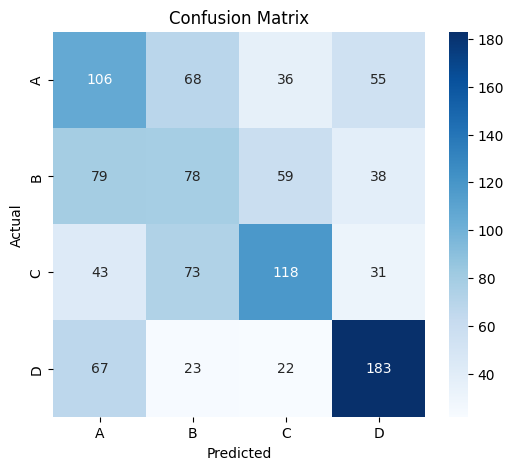

Classification Report:
               precision    recall  f1-score   support

           A       0.36      0.40      0.38       265
           B       0.32      0.31      0.31       254
           C       0.50      0.45      0.47       265
           D       0.60      0.62      0.61       295

    accuracy                           0.45      1079
   macro avg       0.44      0.44      0.44      1079
weighted avg       0.45      0.45      0.45      1079



<ipython-input-29-b600d6ea2612>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


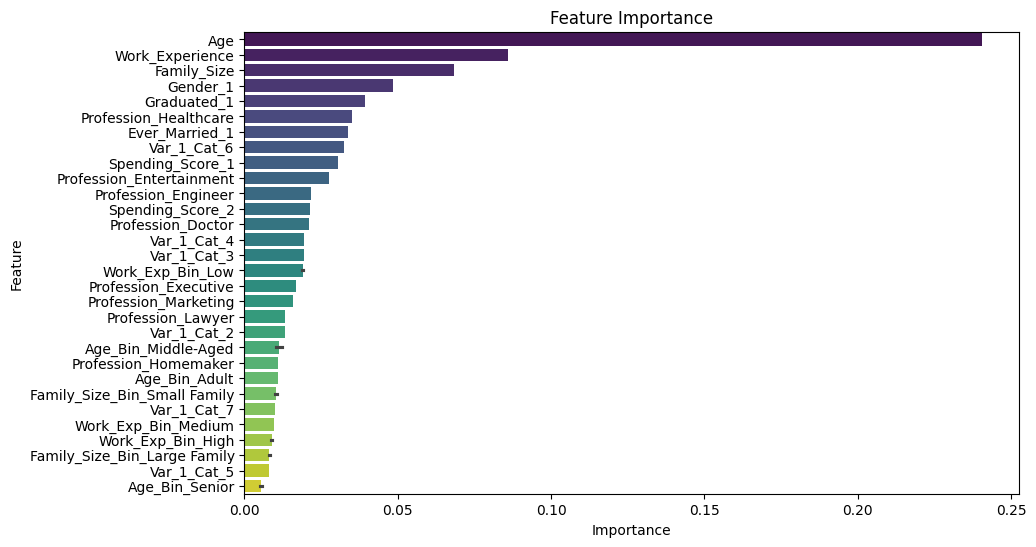

Top Features:
                     Feature  Importance
0                        Age    0.240638
1            Work_Experience    0.085782
2                Family_Size    0.068388
3                   Gender_1    0.048426
5                Graduated_1    0.039258
10     Profession_Healthcare    0.035003
4             Ever_Married_1    0.033687
20               Var_1_Cat_6    0.032486
14          Spending_Score_1    0.030614
8   Profession_Entertainment    0.027457
Starting validation...
Training model...
Making predictions...
Saving predictions...
Predictions saved to random_forest_2.csv


In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# validate(BaggingClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_estimators=10, random_state=42), train_df, val_df, df_test)
validate_with_split(RandomForestClassifier(n_estimators=100, random_state=42), train_df, val_df, df_test)

validate(RandomForestClassifier(n_estimators=100, random_state=42), df_train, df_test, 'random_forest_2')

In [ ]:
train_df.columns

Index(['Age', 'Work_Experience', 'Family_Size', 'Segmentation', 'Gender_1',
       'Ever_Married_1', 'Graduated_1', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_1',
       'Spending_Score_2', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4',
       'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7', 'Age_Bin_Adult',
       'Age_Bin_Middle-Aged', 'Age_Bin_Senior', 'Work_Exp_Bin_Low',
       'Work_Exp_Bin_Medium', 'Work_Exp_Bin_High',
       'Family_Size_Bin_Small Family', 'Family_Size_Bin_Large Family',
       'Age_Bin_Adult', 'Age_Bin_Middle-Aged', 'Age_Bin_Senior',
       'Work_Exp_Bin_Low', 'Work_Exp_Bin_Medium', 'Work_Exp_Bin_High',
       'Family_Size_Bin_Small Family', 'Family_Size_Bin_Large Family'],
      dtype='object')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, log_loss, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def validate_with_hyperparameter_tuning(model, param_grid, train_df, val_df, df_test, file_name='submission', scoring='f1_macro'):
    """
    Perform hyperparameter tuning using GridSearchCV and validate the model.

    Parameters:
        model: Base estimator (e.g., RandomForestClassifier)
        param_grid: Dictionary of hyperparameter values to search
        train_df: Training dataframe
        val_df: Validation dataframe
        df_test: Test dataframe
        file_name: Name of the submission file
        scoring: Scoring metric for GridSearchCV (default: 'f1_macro')
    """
    X_train, y_train = train_df.drop(columns=target_col), train_df[target_col].values.ravel()
    X_val, y_val = val_df.drop(columns=target_col), val_df[target_col].values.ravel()
    X_test = df_test.drop(columns=['ID'], errors='ignore')  # Remove ID if exists

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5, verbose=1, n_jobs=-1)

    print("Performing hyperparameter tuning...")
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

    y_val_pred = best_model.predict(X_val)
    f1 = f1_score(y_val, y_val_pred, average='macro')
    print(f"F1 score: {f1:.4f}")
    print(f"Accuracy score: {accuracy_score(y_val, y_val_pred)}")

    log = log_loss(y_val, best_model.predict_proba(X_val))
    print(f"Validation Log Loss: {log:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred, labels=['A', 'B', 'C', 'D'])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A', 'B', 'C', 'D'], yticklabels=['A', 'B', 'C', 'D'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Classification Report
    print("Classification Report:\n", classification_report(y_val, y_val_pred))

    y_test_pred = best_model.predict(X_test)

    df_submission = pd.DataFrame({
        'ID': temp_test['ID'] if 'ID' in df_test.columns else range(len(y_test_pred)),
        'Segmentation': y_test_pred
    })

    df_submission.to_csv(f'{file_name}.csv', index=False)
    print(f"Predictions saved to {file_name}.csv")

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# validate_with_hyperparameter_tuning(
#     model=RandomForestClassifier(random_state=42),
#     param_grid=param_grid,
#     train_df=train_df,
#     val_df=val_df,
#     df_test=df_test,
#     file_name='random_forest_tuned'
# )

## 4.1.2 Voting (Parallel Ensemble)

F1 score: 0.4034
Accuracy score: 0.40593141797961074
Validation Log Loss: 1.2675


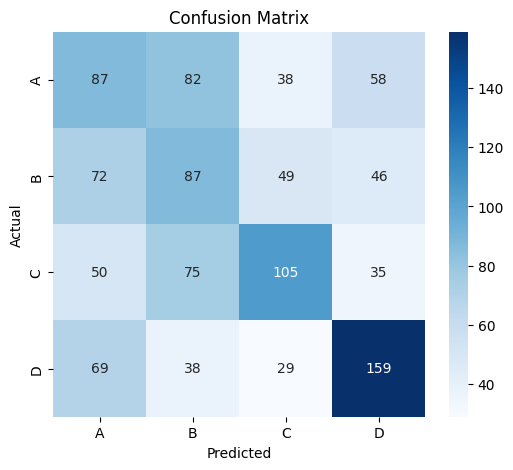

Classification Report:
               precision    recall  f1-score   support

           A       0.31      0.33      0.32       265
           B       0.31      0.34      0.32       254
           C       0.48      0.40      0.43       265
           D       0.53      0.54      0.54       295

    accuracy                           0.41      1079
   macro avg       0.41      0.40      0.40      1079
weighted avg       0.41      0.41      0.41      1079

Starting validation...
Training model...
Making predictions...
Saving predictions...
Predictions saved to voting_2.csv


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

validate_with_split(VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier()), ('gb', GradientBoostingClassifier())], voting='soft'), train_df, val_df, df_test)

validate(VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier()), ('gb', GradientBoostingClassifier())], voting='soft'), df_train, df_test, 'voting_2')

## 4.1.3 Stacking (Parallel Ensemble with Meta Learning)

F1 score: 0.4707
Accuracy score: 0.48378127896200185
Validation Log Loss: 1.1244


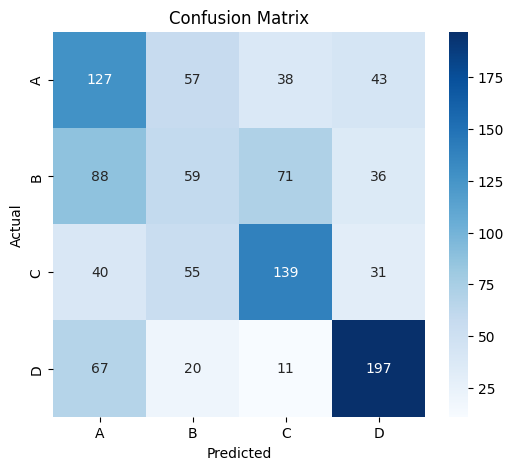

Classification Report:
               precision    recall  f1-score   support

           A       0.39      0.48      0.43       265
           B       0.31      0.23      0.27       254
           C       0.54      0.52      0.53       265
           D       0.64      0.67      0.65       295

    accuracy                           0.48      1079
   macro avg       0.47      0.48      0.47      1079
weighted avg       0.48      0.48      0.48      1079

Starting validation...
Training model...
Making predictions...
Saving predictions...
Predictions saved to stacking.csv


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

validate_with_split(StackingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier()), ('gb', GradientBoostingClassifier())], final_estimator=LogisticRegression()), train_df, val_df, df_test)

validate(StackingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier()), ('gb', GradientBoostingClassifier())], final_estimator=LogisticRegression()), df_train, df_test, 'stacking')

## 4.1.4 Boosting

F1 score: 0.4610
Accuracy score: 0.46617238183503246
Validation Log Loss: 1.2076


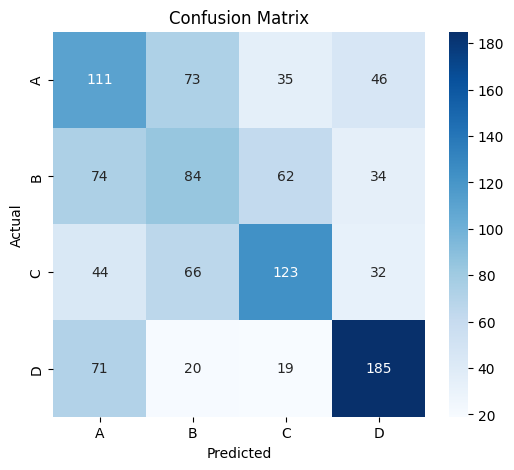

Classification Report:
               precision    recall  f1-score   support

           A       0.37      0.42      0.39       265
           B       0.35      0.33      0.34       254
           C       0.51      0.46      0.49       265
           D       0.62      0.63      0.62       295

    accuracy                           0.47      1079
   macro avg       0.46      0.46      0.46      1079
weighted avg       0.47      0.47      0.47      1079



<ipython-input-29-b600d6ea2612>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


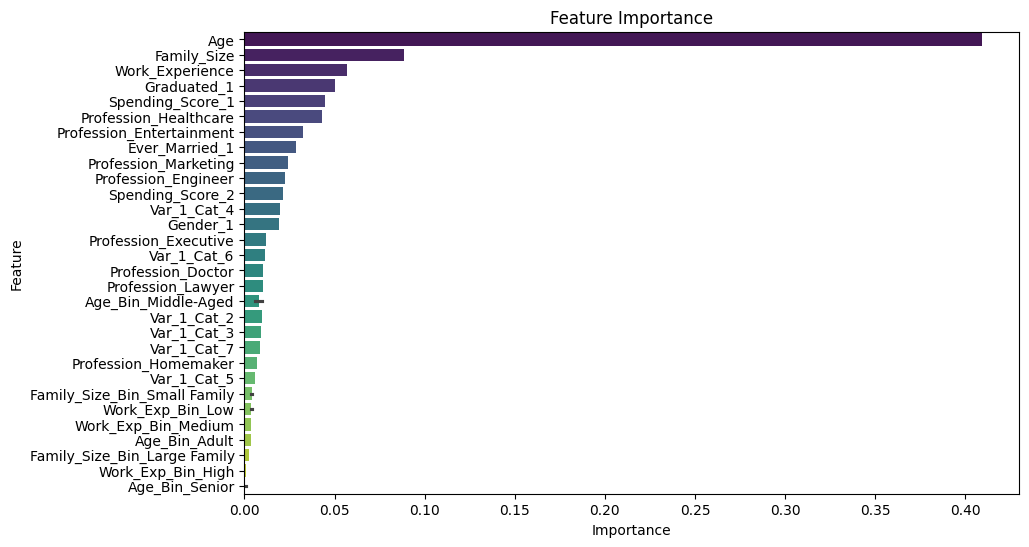

Top Features:
                     Feature  Importance
0                        Age    0.409527
2                Family_Size    0.088812
1            Work_Experience    0.056905
5                Graduated_1    0.050436
14          Spending_Score_1    0.044924
10     Profession_Healthcare    0.043170
8   Profession_Entertainment    0.032367
4             Ever_Married_1    0.028443
13      Profession_Marketing    0.024343
7        Profession_Engineer    0.022701
Starting validation...
Training model...
Making predictions...
Saving predictions...
Predictions saved to boosting.csv


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

validate_with_split(GradientBoostingClassifier(n_estimators=500), train_df, val_df, df_test)

validate(GradientBoostingClassifier(n_estimators=200), df_train, df_test, 'boosting')

# 5. Error Analysis


1. Which segments (A, B, C, D) have the highest and lowest misclassification rates?
2. Are there any specific segments where the model struggles to make correct predictions?
3. Which features contribute the most to incorrect predictions?
4. Which ensemble technique (Bagging, Boosting, Stacking, Voting) produces the lowest log loss?
5. Are there significant differences in error distribution between different ensemble models?
6. Does a particular model consistently misclassify certain segments more than others?
7. etc..

Berdasarkan data-data di atas, segmen yang memiliki kesalahan klasifikasi tertinggi adalah segmen B, di mana pada setiap model segmen B selalu menjadi segmen dengan misklasifikasi tertinggi, sementara segmen D menjadi segmen dengan misklasifikasi terendah pada semua model. Model B menjadi segmen yang paling sulit untuk diprediksi karena memiliki jumlah data paling sedikit dibanding data lainnya, sehingga sulit untuk melakukan sampling yang mendapatkan pola yang menghasilkan kelas target B.

Dari seluruh model baik Bagging, Boosting, Stacking maupun Voting, keempatnya memiliki kinerja yang mirip terutama pada Bagging, Stacking dan Boosting, namun model Voting menghasilkan model yang tidak terlalu akurat karena hanya mengandalkan probabilitas terbesar dari model-model yang digunakannya, sementara itu model-model yang digunakan juga tidak menggunakan epoch dengan jumlah tinggi atau banyak estimator terlalu banyak untuk meningkatkan performansinya. Oleh karenanya log loss tertinggi dari keempat model ini juga adalah model Voting. Dari tingkat error yang dihasilkan, tidak ada perbedaan signifikan antara Bagging, Boosting dan Stacking, namun Voting memiliki error yang cukup tinggi karena hanya mengandalkan probabilitas terbesar dari model-model yang dimasukkan dan menyebabkan misklasifikasi model terjadi lebih sering.

Fitur yang memiliki importance terbesar adalah Age diikuti oleh Work Experience dan Family Size, dan berdasarkan data, Work Experience dan Age menghasilkan misklasifikasi yang besar karena keduanya memiliki nilai yang sangat tersebar dan berkebalikan.

In [ ]:
# Kode yang menghasilkan hasil terbaik yang dipilih

# import pandas as pd
# import numpy as np
# from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Holdout Split - train-test split (80/20)
# train_df, val_df = train_test_split(
#     df_train,
#     test_size=0.2,
#     stratify=df_train[target_col],
#     random_state=42
# )

# # Handle missing data and normalize df_test
# df_test = handle_missing_data(df_test, numerical_features, categorical_features)
# df_test = normalize_numerical_features(df_test, numerical_features)
# print(df_train.head())

# # Apply encoding to test dataset
# df_test = encode_test_categorical_features(df_test, train_columns)

# # Align train & test columns (fix missing columns issue)
# missing_cols = set(train_df.columns) - set(df_test.columns)
# for col in missing_cols:
#     df_test[col] = 0  # Add missing columns with default 0

# # Ensure columns are in the same order
# df_test = df_test[train_df.columns.drop(target_col)]  # Drop target from train_df to align

# # Separate Features and Target
# X_train, y_train = train_df.drop(columns=target_col), train_df[target_col].values.ravel()
# X_val, y_val = val_df.drop(columns=target_col), val_df[target_col].values.ravel()
# X_test = df_test.drop(columns=['id'], errors='ignore')  # Remove ID if exists

# # Define Bagging Classifier with Random Forest as Base Model
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# bagging_clf = BaggingClassifier(estimator=rf_model, n_estimators=10, random_state=42)

# # Train Model
# bagging_clf.fit(X_train, y_train)

# # Validate Model
# y_val_pred = bagging_clf.predict(X_val)
# val_accuracy = accuracy_score(y_val, y_val_pred)
# print(f"Validation Accuracy: {val_accuracy:.4f}")

# # Predict on Test Set
# y_test_pred = bagging_clf.predict(X_test)

# # Convert predictions to a DataFrame
# df_submission = pd.DataFrame({
#     'ID': temp_test['ID'],
#     'Segmentation': y_test_pred
# })

# # Save predictions as CSV
# df_submission.to_csv('submission.csv', index=False)